# Rapport E1, Étude

## Fonctions et import

In [1]:
import pandas as pd
from pandas_profiling import ProfileReport

from matplotlib import pyplot as plt

import random

from sklearn.metrics import accuracy_score, classification_report, r2_score


In [41]:
class Faussaire:
    _prenoms_csv= "datas/Prenoms.csv"
    _filtre_prenoms= 1
    _noms_csv= "datas/patronymes.csv"
    _freq_nom= 120
    __liste_prenoms_courant_homme= None
    __liste_prenoms_courant_femme= None
    __liste_noms_filtre= None
    __prenoms= None
    __noms= None
    __long_liste_fem= 0
    __long_liste_hom= 0
    __long_liste_nom= 0
    
    def __init__(self):
        # Prénoms h et f
        self.__prenoms= pd.read_csv(self._prenoms_csv, sep= ';', encoding="latin1") #, encoding="latin1"
        prenoms_courant= self.__prenoms[self.__prenoms["04_fréquence"] > self._filtre_prenoms]

        prenoms_courant_femme= prenoms_courant[ (prenoms_courant["02_genre"]== "f") | 
                                              (prenoms_courant["02_genre"]== 'm,f') |
                                              (prenoms_courant["02_genre"]== 'f,m')]
        self.__liste_prenoms_courant_femme= list(prenoms_courant_femme["01_prenom"])
        self.__long_liste_fem= len(self.__liste_prenoms_courant_femme)


        prenoms_courant_homme= prenoms_courant[ (prenoms_courant["02_genre"]== "m") |
                                              (prenoms_courant["02_genre"]== 'm,f') |
                                              (prenoms_courant["02_genre"]== 'f,m')]
        self.__liste_prenoms_courant_homme= list(prenoms_courant_homme["01_prenom"])
        self.__long_liste_hom= len(self.__liste_prenoms_courant_homme)
        
        # Noms
        self.__noms= pd.read_csv(self._noms_csv)
        noms_filtre= self.__noms[self.__noms["count"]>self._freq_nom]
        self.__liste_noms_filtre= list(noms_filtre["patronyme"])
        self.__long_liste_nom= len(self.__liste_noms_filtre)

    def nom_prenom(self, genre= None):
        assert genre== 'f' or genre== 'h', "ERREUR de valeur: Le genre doît être 'f' ou 'h'"

        #try:
        i= random.randint(0, self.__long_liste_nom - 1)
        nom= self.__liste_noms_filtre[i]
            #print("nom", self.__long_liste_nom - 1)
        #except:
        #    print(f"Problème avec génération nom: i:{i}, long noms {len(self.__liste_noms_filtre)}")
        
        #try:
        if genre== 'f':
            #print("femme")
            j= random.randint(0, self.__long_liste_fem - 1)
            prenom= self.__liste_prenoms_courant_femme[j]
        else:
            #print("homme", self.__long_liste_hom - 1)
            j= random.randint(0, self.__long_liste_hom - 1)
            prenom= self.__liste_prenoms_courant_homme[j]
        #except:
        #    try:
        #        print(f"j:{j}, long fem ") #{len(self.__liste_prenoms_courant_femme)}
        #        print(f"j:{j}, long hom")# {len(self.__liste_prenoms_courant_homme)}
        #    except:
        #        print("Pas de j !", self.__long_liste_fem)
        #        return i, len(self.__liste_noms_filtre), None

        return  nom, prenom#, len(self.__liste_noms_filtre)
    
    def voir_nom_i(self, i):
        return self.__liste_noms_filtre[i]
    
    def voir_df_noms(self):
        return self.__noms
        
    def voir_df_prenoms(self):
        return self.__prenoms
        


In [42]:
faux_et_usage_de_faux= Faussaire()

In [44]:

for i in range(50000):
    nom, prenom= faux_et_usage_de_faux.nom_prenom('h')

In [40]:
nom, prenom, long

('VIOLA', 'job', 11881)

## Importation des données
Pour étudier le contenu du dataset, on va supprimer la colonne id et rajouter une colonne IMC pour traquer les valeur abérantes.

In [3]:
df= pd.read_csv("./datas/cardio_train.csv",sep= ";")
#df.columns
# suppression de la colonne id
df.drop("id", axis= 1, inplace= True)

df["IMC"]= df.weight/((df.height/100)**2)
# suppression de valeur abbérante IMC
#df= df[df.IMC > 14]
#df= df[df.IMC < 50]

# suppression valeurs abbérantes pression artérielle
#df= df[df.ap_hi > 50]
#df= df[df.ap_hi < 300]

#df= df[df.ap_lo > 20]
#df= df[df.ap_lo < 300]

# suppression de la taille et du poids redondante avec l'IMV
#df.drop("height", axis= 1, inplace= True)
#df.drop("weight", axis= 1, inplace= True)

df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,IMC
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0,26.927438
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1,50.472681
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1,31.353579
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1,27.099251


In [9]:
df.height.max(), df.height.min(), df.weight.max(), df.weight.min(), df.ap_hi.max(), df.ap_hi.min(), df.ap_lo.max(), df.ap_lo.min()

(250, 55, 200.0, 10.0, 16020, -150, 11000, -70)

In [10]:
analyse= ProfileReport(df)
analyse.to_file(output_file="cardio.html")

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
cte_age_an_jour= 365.242199
print(f"Dans ce jeu de donnée, le patient le plus jeune à {int(10798/cte_age_an_jour)} ans et le "+\
      f"plus âgé {int(23713/cte_age_an_jour)} ans avec une moyenne d'âge de {int(19468/cte_age_an_jour)} ans.")

Dans ce jeu de donnée, le patient le plus jeune à 29 ans et le plus âgé 64 ans avec une moyenne d'âge de 53 ans.


### Recherche de valeurs abbérantes:  
Il y a un certains nombre de valeurs abbérantes qu'il convient de traiter.  
Exemple:  
* Enregistrement 9223, âge 21220, genre 1, taille 250
* Enregistrement 82567, âge 18804, genre 2, poids 10.0 pression artérielle 180/1100  
  
On va supprimer ces enregistrements
  
Pour supprimer les valeur abbérantes poids / taille on créer la colonne IMC.
Les IMC < 14 et > 50 seront supprimées  

|IMC 	|Interprétation|
|-------|--------------|
|+ de 40|obésité morbide ou massive|
|35 à 40|obésité sévère|
|30 à 35|obésité modérée|
|25 à 30|surpoids|
|18.5 à 25|corpulence normale|
|16.5 à 18.5|maigreur|
|- de 16.5|famine|


In [14]:
df[ (df.IMC>40)&(df.cardio== 0)&(df.active== 0)]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,IMC
435,16765,1,186,200.0,130,70,1,1,0,0,0,0,57.810151
591,14705,1,164,125.0,130,90,1,1,0,0,0,0,46.475312
992,21897,1,154,110.0,110,70,1,1,0,0,0,0,46.382189
1230,15126,2,173,125.0,120,80,1,1,1,0,0,0,41.765512
1399,22644,1,166,131.0,120,80,3,3,0,0,0,0,47.539556
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61503,17375,1,162,110.0,110,60,1,3,0,0,0,0,41.914342
62938,17325,1,165,115.0,120,80,1,1,0,0,0,0,42.240588
64115,18426,1,59,57.6,125,67,1,1,0,0,0,0,165.469693
66751,21182,1,157,126.0,140,90,3,3,0,0,0,0,51.117692


In [17]:
df[ (df.IMC<15)&(df.cardio== 0)&(df.active== 0) ]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,IMC
22307,21228,1,169,42.0,150,90,2,2,0,0,0,0,14.705367
63154,22192,2,198,58.0,110,70,1,1,0,0,0,0,14.794409


In [20]:
df[ (df.ap_hi<5)|(df.ap_hi>300) ]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,IMC
1876,15116,1,160,60.0,902,60,1,1,0,0,1,0,23.437500
2014,22712,2,167,59.0,906,0,1,1,0,0,1,0,21.155294
4607,15281,1,165,78.0,-100,80,2,1,0,0,1,0,28.650138
4817,14425,1,168,63.0,909,60,2,1,0,0,1,0,22.321429
7763,21032,1,175,80.0,11500,90,1,1,0,0,1,1,26.122449
8757,16905,2,163,63.0,1,2088,1,1,1,0,1,0,23.711845
8915,18870,1,164,75.0,1420,80,2,1,0,0,1,1,27.885187
9557,22659,1,155,87.0,701,110,1,1,0,0,1,1,36.212279
13895,15996,1,168,72.0,1500,80,1,1,0,0,1,1,25.510204
16021,22108,2,161,90.0,-115,70,1,1,0,0,1,0,34.720883


In [22]:
df[ (df.ap_lo<2)|(df.ap_lo>300) ]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,IMC
228,17489,2,183,98.0,160,1100,1,2,1,0,1,1,29.263340
241,21932,2,157,60.0,160,1000,2,1,0,0,0,1,24.341758
260,18217,1,150,83.0,140,800,1,1,0,0,1,1,36.888889
329,23407,1,176,63.0,160,1000,2,2,0,0,0,1,20.338326
345,18704,1,154,81.0,140,1000,2,1,0,0,1,1,34.154158
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69771,23330,1,167,81.0,160,1000,1,1,0,0,1,1,29.043709
69872,21808,1,152,56.0,160,1000,1,1,0,0,1,1,24.238227
69878,21239,2,168,95.0,160,1000,1,1,0,0,1,1,33.659297
69885,22417,2,166,78.0,170,1000,1,1,0,0,0,0,28.305995


## Création d'une base de donnée
On va recharger le dataset et éliminer les valeur aberrantes.

In [45]:
df= pd.read_csv("./datas/cardio_train.csv",sep= ";")

# Création de l'IMC:
df["IMC"]= df.weight/((df.height/100)**2)
# Suppression de valeur abbérante IMC
# On supprime les IMC>40 qui ne font pas de sport et noter sans risque cardio
df= df[ (df.IMC<40)|(df.cardio== 1)|(df.active== 1) ]
# On supprime les IMC<15 qui ne font pas de sport et noter sans risque cardio
df= df[ (df.IMC>15)|(df.cardio== 1)|(df.active== 1) ]

# suppression valeurs abbérantes pression artérielle
df= df[ (df.ap_hi>5)&(df.ap_hi<300) ]
df= df[ (df.ap_lo>2)&(df.ap_hi<300) ]

# suppression de la colonne IMC qui n'appartient pas au dataset original
df.drop("IMC", axis= 1, inplace= True)


### Ajout des patients et des médecins

In [46]:
df= df.reset_index(drop= True)
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69816,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69817,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69818,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69819,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [79]:
faux_et_usage_de_faux= Faussaire()

liste_medecin=[]
hf=['h','f']
liste_medecin.append(("MAFFRE","lucas",1))
for i in range(200):
    nom, prenom= faux_et_usage_de_faux.nom_prenom(hf[random.randint(0,1)])
    l= nom, prenom, i+2
    liste_medecin.append(l)


liste_medecin #[random.randint(0, len(liste_medecin)-1)]


[('MAFFRE', 'lucas', 1),
 ('BARDOT', 'étienne', 2),
 ('NIEL', 'flip', 3),
 ('CHARVOLIN', 'io', 4),
 ('DARTOIS', 'mathieu', 5),
 ('VEAUX', 'amie', 6),
 ('COIN', 'justice', 7),
 ('DUPERRON', 'marceline', 8),
 ('MARQUANT', 'justice', 9),
 ('AMSALLEM', 'bas', 10),
 ('VIGNOT', 'san', 11),
 ('SOUCHAL', 'jérémie', 12),
 ('BOUTIN', 'pandora', 13),
 ('SCHAEFER', 'vidal', 14),
 ('CAPELLE', 'gail', 15),
 ('ALLIBERT', 'humphrey', 16),
 ('BONI', 'dorothy', 17),
 ('GALAN', 'rosita', 18),
 ('SEGURET', 'gilles', 19),
 ('PRALONG', 'ida', 20),
 ('TOURTE', 'nadine', 21),
 ('ROCHEREAU', 'lili', 22),
 ('DELOS', 'hortense', 23),
 ('LE MAT', 'alessandro', 24),
 ('BESSIERE', 'ju', 25),
 ('GOURDON', 'frédéric', 26),
 ('CARRAT', 'théodore', 27),
 ('GAUTIER', 'cristal', 28),
 ('CLAUSSE', 'ottavio', 29),
 ('DONNART', 'norbert', 30),
 ('DARCY', 'davis', 31),
 ('CLAMENS', 'hélène', 32),
 ('ESCUDIE', 'peggy', 33),
 ('COURBE', 'emma', 34),
 ('VILLEMAIN', 'pablo', 35),
 ('MAYOT', 'aaron', 36),
 ('BARRA', 'carlo', 37),

In [80]:
#print(faux_et_usage_de_faux.nom_prenom('f'), faux_et_usage_de_faux.nom_prenom('h'))
#print(faux_et_usage_de_faux.voir_nom_i(7617), faux_et_usage_de_faux.voir_nom_i(4393), sep=",")

df=df.reset_index(drop=True)

df["nom"]= ""
df["prenom"]= ""
df["idp"]=0
df["nom_med"]= ""
df["prenom_med"]= ""
df["idmed"]= 0

for idx, row in df.iterrows():
    df.loc[idx,"idp"]= idx +1
    med= liste_medecin[random.randint(0, len(liste_medecin)-1)]
    df.loc[idx,"nom_med"]= med[0]
    df.loc[idx,"prenom_med"]= med[1]
    df.loc[idx,"idmed"]= med[2]
    if df.loc[idx,"gender"]== 1:
        nom, prenom= faux_et_usage_de_faux.nom_prenom('h')
        df.loc[idx,"nom"]= nom
        df.loc[idx,"prenom"]= prenom
    else:
        nom, prenom= faux_et_usage_de_faux.nom_prenom('f')
        df.loc[idx,"nom"]= nom
        df.loc[idx,"prenom"]= prenom

df




,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,nom,prenom,idp,nom_med,prenom_med,idmed
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,MILANI,mo,1,BREBION,hector,168
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,ROUVIERE,achille,2,BRACQ,molly,110
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,PAULET,grégoire,3,COUTIER,cerise,154
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,OUDART,delta,4,BONVALET,étienne,78
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,BACHE,juste,5,PASQUIER,hamilton,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69816,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,DULIN,lotus,69817,VILLEMAIN,pablo,35
69817,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,GARET,hall,69818,PALLIER,cyrille,174
69818,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,LAKEHAL,cyrille,69819,ALLIBERT,humphrey,16
69819,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,DUREUIL,georges,69820,BESSIERE,ju,25


In [83]:
df.to_csv("test.csv", encoding= "utf-8", sep=",")

In [81]:
df[df.nom== "MAFFRE"]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,nom,prenom,idp,nom_med,prenom_med,idmed
13252,18944,19721,1,170,73.0,120,80,1,1,0,0,0,1,MAFFRE,turin,13253,ALLIBERT,humphrey,16
20331,29086,16091,1,151,64.0,110,80,1,1,0,0,0,0,MAFFRE,amar,20332,SANTAMARIA,france,50
32775,46936,21944,2,171,68.0,120,80,1,1,1,0,1,0,MAFFRE,marcia,32776,SIRI,dom,142
33053,47349,18829,1,154,72.0,140,100,2,1,0,0,1,1,MAFFRE,antoine,33054,BASSOT,carla,120
38364,54912,21291,2,175,110.0,140,90,1,1,0,0,1,1,MAFFRE,laura,38365,BONVARLET,bruno,157
51640,73837,22003,1,160,60.0,150,100,3,1,0,0,0,1,MAFFRE,spencer,51641,NERON,platon,128
66646,95407,21825,1,156,70.0,150,80,2,1,0,0,1,1,MAFFRE,francis,66647,PASTORE,sylvia,130
66847,95681,19606,1,156,53.0,140,90,3,1,0,0,1,0,MAFFRE,giorgio,66848,BOCHATON,ah,163


In [82]:
df[df.nom== "ESPITALIER"]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,nom,prenom,idp,nom_med,prenom_med,idmed
476,684,19756,1,152,60.0,120,60,1,1,0,0,1,0,ESPITALIER,narcisse,477,SAILLY,allie,183
3881,5505,19019,1,164,85.0,120,80,3,1,0,0,1,0,ESPITALIER,fabiano,3882,DEPREZ,romane,104
4453,6323,19815,1,158,58.0,120,80,1,1,0,0,1,0,ESPITALIER,gosse,4454,DOMONT,marcia,75
8490,12140,16260,1,150,60.0,120,80,1,1,0,0,1,0,ESPITALIER,royal,8491,AYRAULT,maurice,201
14656,20985,14409,2,174,75.0,110,70,1,1,0,0,1,0,ESPITALIER,florence,14657,ROLLIER,isabelle,80
21893,31342,20483,1,170,70.0,110,70,1,1,0,0,1,0,ESPITALIER,germano,21894,GRUAU,amar,70
35504,50831,21199,2,166,84.0,160,90,1,1,0,0,1,1,ESPITALIER,yoshiko,35505,BAUDUIN,claire,95
47313,67752,20545,1,167,80.0,130,90,3,3,0,0,1,1,ESPITALIER,timothée,47314,PAGNIEZ,aurélie,51
60818,87053,17574,2,160,52.0,160,90,1,1,0,0,1,1,ESPITALIER,aimée,60819,WOLF,olga,155


In [63]:
liste_medecin=[]
hf=['h','f']
for i in range(200):
    nom, prenom= faux_et_usage_de_faux.nom_prenom(hf[random.randint(0,1)])
    l= nom, prenom, i+1
    liste_medecin.append(l)
liste_medecin[random.randint(0, len(liste_medecin)-1)]


('LE PORT', 'thibault', 123)

In [141]:
df["nom"].iloc[538]= "toto"

/tmp/ipykernel_4940/1964659649.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["nom"].iloc[538]= "toto"


In [112]:
el["nom"]= "toto"

TypeError: 'Pandas' object does not support item assignment

In [93]:
#df.drop("level_0", axis= 1, inplace= True)
df.drop("index", axis= 1, inplace= True)
#df.drop("nom", axis= 1, inplace= True)
#df.drop("prenom", axis= 1, inplace= True)


In [129]:
#df.set_index("id",inplace = True)
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,nom,prenom
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,SAURA,orly
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,PATUREAU,ben
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,AHAMADA,monet
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,LABE,juanita
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,TROUILLARD,nir
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69816,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,None,None
69817,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,None,None
69818,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,None,None
69819,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,None,None


In [59]:
i,df.gender[435]

KeyError: 435

In [36]:
# La matrice d'Inès :)
matrice_corr = df.corr(method='spearman').style.format("{:.3}").background_gradient(cmap=plt.get_cmap('coolwarm'))
matrice_corr

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.0,0.0025,0.00351,-0.00187,-0.00111,0.00322,-0.000266,0.00581,0.00259,-0.00369,0.00106,0.00369,0.00369
age,0.0025,1.0,-0.0205,-0.0824,0.0618,0.219,0.157,0.14,0.0917,-0.0476,-0.0305,-0.0107,0.235
gender,0.00351,-0.0205,1.0,0.534,0.174,0.0635,0.0665,-0.0356,-0.0187,0.338,0.171,0.00445,0.00746
height,-0.00187,-0.0824,0.534,1.0,0.316,0.0192,0.03,-0.0591,-0.0242,0.198,0.0967,-0.0098,-0.0137
weight,-0.00111,0.0618,0.174,0.316,1.0,0.279,0.255,0.138,0.109,0.072,0.0684,-0.0104,0.185
ap_hi,0.00322,0.219,0.0635,0.0192,0.279,1.0,0.738,0.209,0.105,0.0293,0.0331,-0.00127,0.453
ap_lo,-0.000266,0.157,0.0665,0.03,0.255,0.738,1.0,0.168,0.0824,0.0261,0.0388,0.00337,0.363
cholesterol,0.00581,0.14,-0.0356,-0.0591,0.138,0.209,0.168,1.0,0.408,0.015,0.0409,0.00778,0.216
gluc,0.00259,0.0917,-0.0187,-0.0242,0.109,0.105,0.0824,0.408,1.0,0.000246,0.0183,-0.00737,0.0922
smoke,-0.00369,-0.0476,0.338,0.198,0.072,0.0293,0.0261,0.015,0.000246,1.0,0.34,0.0256,-0.0156


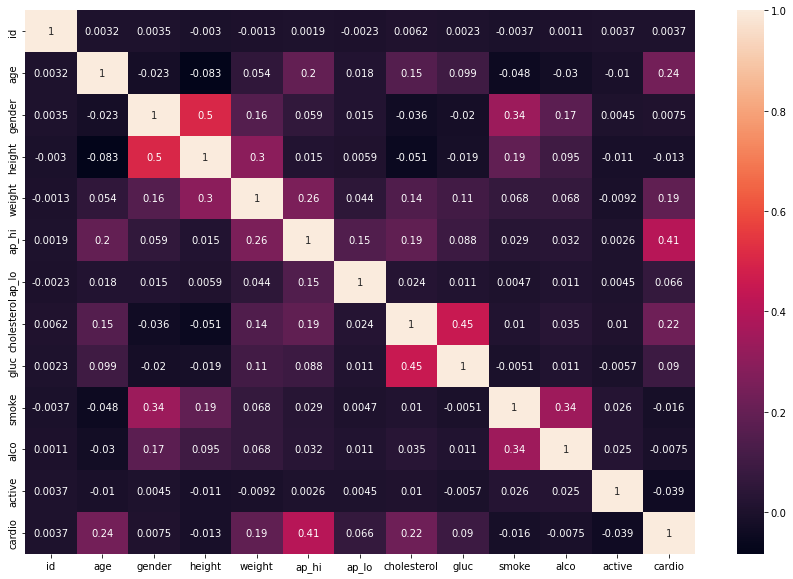

In [39]:
import seaborn as sn

corrMatrix = df.corr()
plt.figure(figsize=(15,10))
sn.heatmap(corrMatrix, annot=True)
plt.show()
